In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import  train_test_split

In [2]:
wine=load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
features=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['target'])

In [6]:
df=pd.concat([features,target],axis=1)

In [7]:
correlation=df.corr('pearson')

In [8]:
correlation['target'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
target                          1.000000
Name: target, dtype: float64

In [9]:
X=df['flavanoids']#presently considering only one feature impacting the target
Y=df['target']

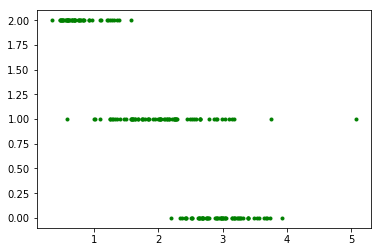

In [10]:
plt.plot(X,Y,'g.')

In [11]:
x=np.array(X)
y=np.array(Y)
x=(x-x.min())/(x.max()-x.min())#didn't need to normalize y for its range is already 0 to 1

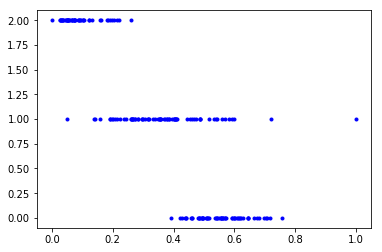

In [12]:
plt.plot(x,y,'b.')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
def hypothesis(a,x,b):
    return(1/(1+np.exp(-(a*x+b))))

In [15]:
def error(a,x,b,y):
    e=0
    m=len(x)
    for i in range(m):
        e+=-(y[i]*np.log(hypothesis(a,x[i],b)))-((1-y[i])*np.log(1-hypothesis(a,x[i],b)))
    return (1/m)*e

In [16]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a+=(hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b+=(hypothesis(a,x[i],b)-y[i])
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    return a,b

In [17]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a=init_a
    b=init_b
    for i in range(iterations):
        e=error(a,x,b,y)
        if i%1000==0:
            print(f"error: {e}, a:{a}, b:{b}")
        a,b=step_gradient(a,x,b,y,learning_rate)
    return a,b

In [18]:
init_a=0
init_b=0
iterations=10000
learning_rate=0.01

In [19]:
final_a,final_b=descend(init_a,x_train,init_b,y_train,learning_rate,iterations)

error: 0.6931471805599462, a:0, b:0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


error: nan, a:-105.90603731852184, b:61.26680865958282
error: nan, a:-208.32449512439652, b:119.94052585106829
error: nan, a:-310.7177380275539, b:178.44214260116817
error: nan, a:-413.0980375417853, b:236.91714592458766
error: nan, a:-515.465402622832, b:295.39606850803483
error: nan, a:-617.8194445613275, b:353.8886977633845
error: nan, a:-720.1603987239424, b:412.39817070895396
error: nan, a:-822.4888618789581, b:470.92522194856167
error: nan, a:-924.8054474928867, b:529.4698882396849


In [20]:
final_a,final_b

(-1027.1107109636446, 588.0319884521512)

In [21]:
error(final_a,x_test,final_b,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


nan

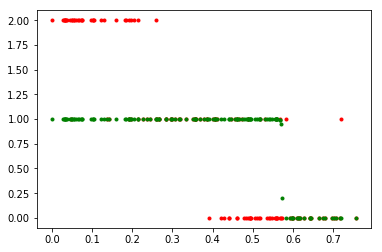

In [22]:
plt.plot(x_train,y_train,'r.',
     x_train,hypothesis(final_a,x_train,final_b),'g.')

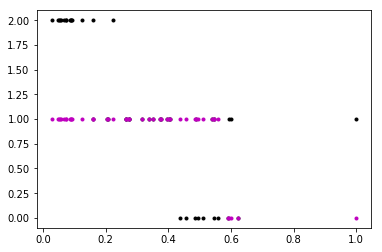

In [23]:
plt.plot(x_test,y_test,'k.',
         x_test,hypothesis(final_a,x_test,final_b),'m.')

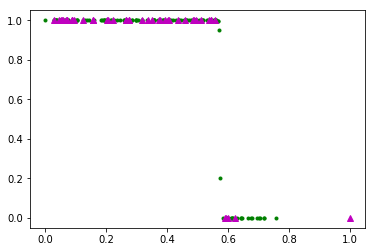

In [24]:
plt.plot( x_train,hypothesis(final_a,x_train,final_b),'g.',
         x_test,hypothesis(final_a,x_test,final_b),'m^')

In [25]:
def accuracy(a,x,b,y):
    correct=0
    m=len(x)
    for i in range(m):
        pred=hypothesis(a,x[i],b)
        if pred>0.5:
            z=1
        else:
            z=0
        if y[i]==z:
            correct+=1
    print(f"Accuracy: {correct/len(y)}")

In [26]:
accuracy(final_a,x_train,final_b,y_train)

Accuracy: 0.518796992481203


In [27]:
accuracy(final_a,x_test,final_b,y_test)

Accuracy: 0.4444444444444444
